# 과제 1

## Matrix 구현 
1. Linear Regression에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해주세요.
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해주세요.

### Data Load 

In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
data = pd.read_csv("/content/drive/MyDrive/ToBigs/Regression/assignment1.csv")

In [3]:
data.head()

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [4]:
data.shape     # y:(9,1), X:(9,5)

(9, 6)

In [5]:
X = data.drop(["y"], axis=1)
y = data.y

In [6]:
# Matrix 계산을 위해 X와 y를 numpy 형태로 바꾸어줍니다. 
X = X.to_numpy()
y = y.to_numpy()

In [7]:
X

array([[  38.9,   64.7,    4. ,  868. ,   59.7],
       [  41.6,   45.3,   -4. ,  957. ,   61.4],
       [  39.7,   74.1,    8. ,  786. ,   61. ],
       [  37.3,   48. ,   19. ,  984. ,   67.5],
       [  39.5,   51.9,    6. ,  700. ,   57.2],
       [  37.4,   53.6,   -5. , 1037. ,   58.8],
       [  35.1,   71.4,    3. ,  986. ,   58.6],
       [  38.8,   58.3,    6. ,  819. ,   59.2],
       [  36.6,   52.6,  -19. ,  791. ,   54.4]])

X =\begin{pmatrix}
 38.9 &  64.7 &   4 & 868 &  59.7 \\
 41.6 &  45.3 &  -4 & 957 &  61.4 \\
 39.7 &  74.1 &   8 & 786 &  61 \\
 37.3 &  48 &  19 & 984 &  67.5 \\
 39.5 &  51.9 &   6 & 700 &  57.2 \\
 37.4 &  53.6 &  -5 & 1037 &  58.8 \\
 35.1 &  71.4 &   3 & 986 &  58.6 \\
 38.8 &  58.3 &   6 & 819 &  59.2 \\
 36.6 &  52.6 & -19 & 791 &  54.4
 \end{pmatrix}

In [8]:
y

array([10, 13, 11,  7, 10,  9,  9,  6,  5])

y =
 \begin{pmatrix}
 10 \\ 13 \\ 11 \\  7 \\ 10 \\  9 \\  9 \\  6 \\  5
 \end{pmatrix}

### 1. Normal Equation

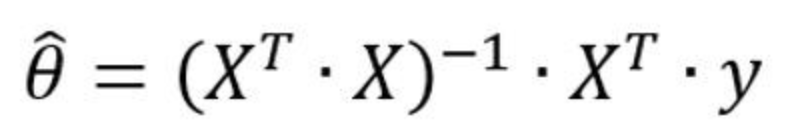

In [9]:
import numpy as np
from numpy.linalg import inv 

**(1) X 행렬에 1 추가하기**
- 절편을 구하기위해 관측치만큼 1을 넣어줌

X =
 \begin{pmatrix}
 1 & 38.9 &  64.7 &   4 & 868 &  59.7 \\
 1 & 41.6 &  45.3 &  -4 & 957 &  61.4 \\
 1 & 39.7 &  74.1 &   8 & 786 &  61 \\
 1 & 37.3 &  48 &  19 & 984 &  67.5 \\
 1 & 39.5 &  51.9 &   6 & 700 &  57.2 \\
 1 & 37.4 &  53.6 &  -5 & 1037 &  58.8 \\
 1 & 35.1 &  71.4 &   3 & 986 &  58.6 \\
 1 & 38.8 &  58.3 &   6 & 819 &  59.2 \\
 1 & 36.6 &  52.6 & -19 & 791 &  54.4
 \end{pmatrix}

In [10]:
################### First step ##################
# np.concatenate([np.ones((len(y), 1)), X] : x0과 X를 합쳐서 새로운 (9,6)의 X 행렬을 만듬
# np.ones((len(y), 1)) : 관측치 개수 만큼 1로 채워진 행렬을 만듬
#################################################

designX = np.concatenate([np.ones((len(y), 1)), X], axis=1)

**(2) X의 전치행렬 구하기**

X^T=
\begin{pmatrix}
1&1&1&1&1&1&1&1&1\\
38.9&41.6&39.7&37.3&39.5&37.4&35.1&38.8&
36.6\\
64.7&45.3&74.1&48&51.9&53.6&71.4&58.3&
52.6\\
4&-4&8&19&6&-5&3&6&
-19\\
868&957&786&984&700&1037&986&819&
791\\
59.7&61.4&61&67.5&57.2&58.8&58.6&59.2&
54.4
\end{pmatrix}

In [11]:
################### Second step ###################
# .T : 행렬 전치
# designX.T : X 행렬을 전치함
###################################################

designX.T

array([[ 1.000e+00,  1.000e+00,  1.000e+00,  1.000e+00,  1.000e+00,
         1.000e+00,  1.000e+00,  1.000e+00,  1.000e+00],
       [ 3.890e+01,  4.160e+01,  3.970e+01,  3.730e+01,  3.950e+01,
         3.740e+01,  3.510e+01,  3.880e+01,  3.660e+01],
       [ 6.470e+01,  4.530e+01,  7.410e+01,  4.800e+01,  5.190e+01,
         5.360e+01,  7.140e+01,  5.830e+01,  5.260e+01],
       [ 4.000e+00, -4.000e+00,  8.000e+00,  1.900e+01,  6.000e+00,
        -5.000e+00,  3.000e+00,  6.000e+00, -1.900e+01],
       [ 8.680e+02,  9.570e+02,  7.860e+02,  9.840e+02,  7.000e+02,
         1.037e+03,  9.860e+02,  8.190e+02,  7.910e+02],
       [ 5.970e+01,  6.140e+01,  6.100e+01,  6.750e+01,  5.720e+01,
         5.880e+01,  5.860e+01,  5.920e+01,  5.440e+01]])

**(3) X의 전치행렬과 X 행렬 곱하기**

X^T x X = 
 \begin{pmatrix}
 1 & 1 & 1&1&1&1&1&1&1 \\
 38.9&   41.6&   39.7&   37.3&   39.5&   37.4&   35.1&   38.8&
          36.6\\
       64.7&   45.3&   74.1&   48&   51.9&   53.6&   71.4&   58.3&
          52.6\\
       4&   -4&    8&   19&    6&   -5&    3&    6&
         -19\\
      868&  957&  786&  984&  700& 1037&  986&  819&
         791\\
       59.7&   61.4&   61&   67.5&   57.2&   58.8&   58.6&   59.2&
          54.4\\
 \end{pmatrix} x \begin{pmatrix}
 1 & 38.9 &  64.7 &   4 & 868 &  59.7 \\
 1 & 41.6 &  45.3 &  -4 & 957 &  61.4 \\
 1 & 39.7 &  74.1 &   8 & 786 &  61 \\
 1 & 37.3 &  48 &  19 & 984 &  67.5 \\
 1 & 39.5 &  51.9 &   6 & 700 &  57.2 \\
 1 & 37.4 &  53.6 &  -5 & 1037 &  58.8 \\
 1 & 35.1 &  71.4 &   3 & 986 &  58.6 \\
 1 & 38.8 &  58.3 &   6 & 819 &  59.2 \\
 1 & 36.6 &  52.6 & -19 & 791 &  54.4
 \end{pmatrix}  = \begin{pmatrix}
    9.00&344.90&519.90&18.00&7928.00&537.80\\
    344.90&13247.17&19881.51&708.20&303254.00&20619.40\\
    519.90&19881.51&30863.17&1190.40&456654.20&31021.31\\
    18.00&708.20&1190.40&924.00&16486.00&1310.30\\
    7928.00&303254.00&456654.20&16486.00&7089332.00&475255.80\\
    537.80&20619.40&31021.31&1310.30&475255.80&32238.54
 \end{pmatrix}

In [12]:
################### Third step ###################
# np.dot : 행렬의 곱셈
# np.dot(designX.T, designX) : 전치한 X 행렬과 X 행렬을 곱함
##################################################

np.dot(designX.T, designX)

array([[9.000000e+00, 3.449000e+02, 5.199000e+02, 1.800000e+01,
        7.928000e+03, 5.378000e+02],
       [3.449000e+02, 1.324717e+04, 1.988151e+04, 7.082000e+02,
        3.032540e+05, 2.061940e+04],
       [5.199000e+02, 1.988151e+04, 3.086317e+04, 1.190400e+03,
        4.566542e+05, 3.102131e+04],
       [1.800000e+01, 7.082000e+02, 1.190400e+03, 9.240000e+02,
        1.648600e+04, 1.310300e+03],
       [7.928000e+03, 3.032540e+05, 4.566542e+05, 1.648600e+04,
        7.089332e+06, 4.752558e+05],
       [5.378000e+02, 2.061940e+04, 3.102131e+04, 1.310300e+03,
        4.752558e+05, 3.223854e+04]])

**(4) 3번 행렬의 역행렬 구하기**

{(X^T x X)}^{-1} = \begin{pmatrix}
    9.00&344.90&519.90&18.00&7928.00&537.80\\
    344.90&13247.17&19881.51&708.20&303254.00&20619.40\\
    519.90&19881.51&30863.17&1190.40&456654.20&31021.31\\
    18.00&708.20&1190.40&924.00&16486.00&1310.30\\
    7928.00&303254.00&456654.20&16486.00&7089332.00&475255.80\\
    537.80&20619.40&31021.31&1310.30&475255.80&32238.54
 \end{pmatrix}^{-1}= \begin{pmatrix}
213.11&-1.22&-0.39&0.77&0.01&-2.62\\
-1.22&0.05&0.00&0.00&0.00&-0.02\\
-0.39&0.00&0.00&-0.00&-0.00&0.00\\
0.77&0.00&-0.00&0.01&0.00&-0.02\\
0.01&0.00&-0.00&0.00&0.00&-0.00\\
-2.62&-0.02&0.00&-0.02&-0.00&0.07
 \end{pmatrix}

In [13]:
################### Fourth step ###################
# inv : 역행렬
# inv(np.dot(designX.T, designX)) : 위에서 곱한 행렬의 역행렬을 구함
###################################################

inv(np.dot(designX.T, designX))

array([[ 2.13111451e+02, -1.21756821e+00, -3.94872253e-01,
         7.73629493e-01,  1.31798148e-02, -2.62213574e+00],
       [-1.21756821e+00,  5.21038395e-02,  1.50771775e-03,
         4.47690658e-03,  6.09118142e-04, -2.36259498e-02],
       [-3.94872253e-01,  1.50771775e-03,  1.74725096e-03,
        -1.46071042e-03, -2.37466429e-05,  4.35105768e-03],
       [ 7.73629493e-01,  4.47690658e-03, -1.46071042e-03,
         5.86729294e-03,  2.28092916e-04, -1.79644089e-02],
       [ 1.31798148e-02,  6.09118142e-04, -2.37466429e-05,
         2.28092916e-04,  2.48514341e-05, -9.62226000e-04],
       [-2.62213574e+00, -2.36259498e-02,  4.35105768e-03,
        -1.79644089e-02, -9.62226000e-04,  6.96124654e-02]])

**(5) 4번 행렬에 X의 전치 행렬 곱하기**

{(X^T x X)}^{-1} . X^T = \begin{pmatrix}
213.11&-1.22&-0.39&0.77&0.01&-2.62\\
-1.22&0.05&0.00&0.00&0.00&-0.02\\
-0.39&0.00&0.00&-0.00&-0.00&0.00\\
0.77&0.00&-0.00&0.01&0.00&-0.02\\
0.01&0.00&-0.00&0.00&0.00&-0.00\\
-2.62&-0.02&0.00&-0.02&-0.00&0.07
 \end{pmatrix} . \begin{pmatrix}
1&1&1&1&1&1&1&1&1\\
38.9&41.6&39.7&37.3&39.5&37.4&35.1&38.8&
36.6\\
64.7&45.3&74.1&48&51.9&53.6&71.4&58.3&
52.6\\
4&-4&8&19&6&-5&3&6&
-19\\
868&957&786&984&700&1037&986&819&
791\\
59.7&61.4&61&67.5&57.2&58.8&58.6&59.2&
54.4
 \end{pmatrix} = \begin{pmatrix}
-1.81&-6.91&-7.89&-0.58&8.41&2.03&3.84&3.05&0.86\\
0.04&0.13&0.04&-0.11&0.02&0.03&-0.05&0.02&-0.12\\
0.01&-0.00&0.03&-0.01&-0.02&-0.01&0.01&-0.01&-0.00\\
0.00&-0.01&-0.03&-0.01&0.04&0.01&0.02&0.02&-0.05\\
0.00&0.00&-0.00&-0.00&-0.00&0.00&0.00&0.00&-0.00\\
-0.01&0.02&0.11&0.12&-0.13&-0.09&-0.06&-0.06&0.11
 \end{pmatrix}

In [14]:
################### Fifth step ###################
# np.dot(inv(np.dot(designX.T, designX)), designX.T) : 역행렬과 전치한 X행렬을 곱함
##################################################

np.dot(inv(np.dot(designX.T, designX)), designX.T)

array([[-1.80709367e+00, -6.90766931e+00, -7.88795071e+00,
        -5.83975738e-01,  8.40511969e+00,  2.02698606e+00,
         3.83995938e+00,  3.05436150e+00,  8.60262782e-01],
       [ 4.29734602e-02,  1.32636250e-01,  3.60752826e-02,
        -1.12042675e-01,  2.06238165e-02,  3.19941955e-02,
        -5.15318422e-02,  1.90336818e-02, -1.19762170e-01],
       [ 1.01283207e-02, -2.72847982e-03,  2.95194120e-02,
        -1.21901357e-02, -2.11414900e-02, -6.31048235e-03,
         9.97801785e-03, -5.13822140e-03, -2.11694126e-03],
       [ 2.25180922e-03, -1.45003299e-02, -2.64855223e-02,
        -6.17159401e-03,  4.19610447e-02,  1.36603693e-02,
         1.62613252e-02,  2.06929027e-02, -4.76700050e-02],
       [ 3.76626994e-04,  1.23318096e-03, -1.73563667e-03,
        -1.40259580e-03, -2.67235194e-04,  2.73959704e-03,
         1.66570046e-03,  1.87272254e-04, -2.79691005e-03],
       [-1.08773684e-02,  1.73403962e-02,  1.08662916e-01,
         1.16154369e-01, -1.29052490e-01, -8.732291

**(6) 5번 행렬에 y를 곱하기**

{(X^T \times X)}^{-1} . X^T  . y = \begin{pmatrix}
-1.81&-6.91&-7.89&-0.58&8.41&2.03&3.84&3.05&0.86\\
0.04&0.13&0.04&-0.11&0.02&0.03&-0.05&0.02&-0.12\\
0.01&-0.00&0.03&-0.01&-0.02&-0.01&0.01&-0.01&-0.00\\
0.00&-0.01&-0.03&-0.01&0.04&0.01&0.02&0.02&-0.05\\
0.00&0.00&-0.00&-0.00&-0.00&0.00&0.00&0.00&-0.00\\
-0.01&0.02&0.11&0.12&-0.13&-0.09&-0.06&-0.06&0.11
 \end{pmatrix} . 
 \begin{pmatrix}
 10 \\ 13 \\ 11 \\  7 \\ 10 \\  9 \\  9 \\  6 \\  5
 \end{pmatrix} = \begin{pmatrix}
-39.24\\ 1.31\\ 0.09\\ 0.07\\ 0.02\\ -0.34
 \end{pmatrix}

In [15]:
################### Last step ###################
# np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y) : 위에서 구한 행렬과 y를 곱함
#################################################

np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y)

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

**정규방정식**
- (1) ~ (6) 과정을 전부 나타낸 함수

In [16]:
################### Nomal equation function ###################
# np.ones((len(y), 1)) : 관측치 개수(len(y)) 만큼의 1로 채워진 행렬을 만듬 
# np.concatenate([np.ones((len(y), 1)), X], axis=1) : x0과 X를 합쳐서 새로운 (9,6)의 X 행렬을 만듬
# np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y) : 앞선 6단계를 구현해둔 함수
###############################################################

def estimate_beta(X, y):
    designX = np.concatenate([np.ones((len(y), 1)), X], axis=1)
    beta_hat = np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y)
    
    return beta_hat

In [17]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

#### **실제 값과 비교**

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
################### Predict model ###################
# model.predict(X) : 모델 예측하는 함수
#####################################################

model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)

In [20]:
print(model.intercept_)   # intercept
print(model.coef_)   # 추정된 회귀계수 (intercept 제외)

-39.24473678135655
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


**Output**

정규방정식을 이용하여 계산한 값과 LinearRegression을 이용한 실제 값이  매우 유사하다.

### 2. MSE

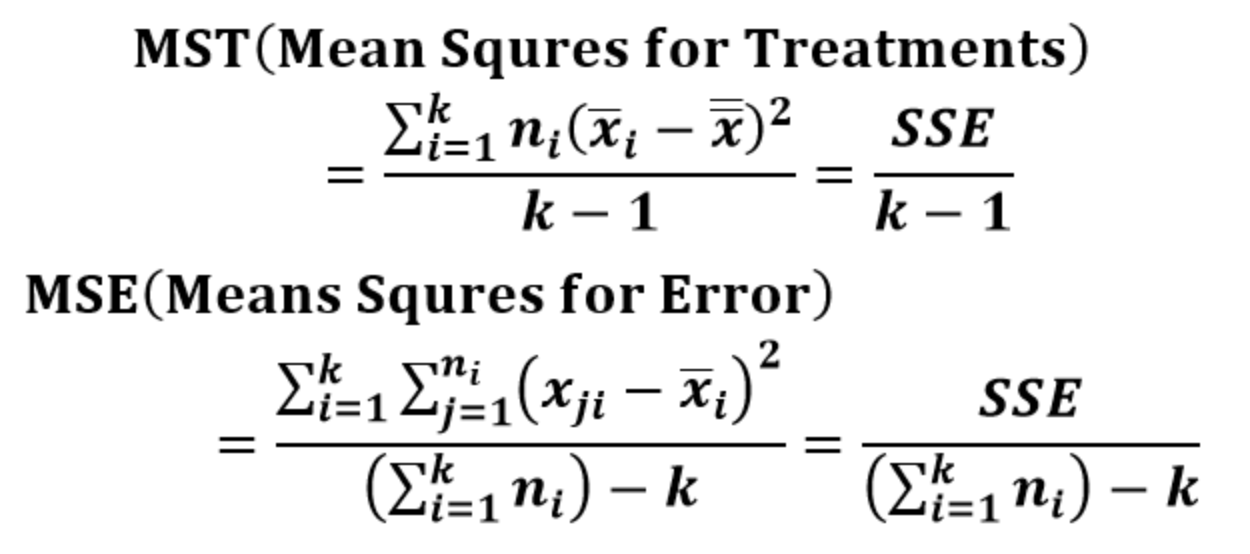

**(1) 실제 값에서 예측 값을 빼 잔차 구하기**
- `y - y_pred`

**(2) (1)번 값에 제곱하기**
- `(y - y_pred)**2)`

**(3) (2)번 값의 합 구하기**
- `np.sum((y - y_pred)**2)`

**(4) (3)번 값을 자유도(관측치의 개수 - 설명변수의 개수)로 나누기**
- `np.sum((y - y_pred)**2) / (len(y) - len(designX.T))`

In [21]:
################### MSE function ###################
# np.ones((len(y), 1)) : 관측치 개수(len(y)) 만큼의 1로 채워진 행렬을 만듬 
# np.concatenate([np.ones((len(y), 1)), X], axis=1) : x0과 X를 합쳐서 새로운 (9,6)의 X 행렬을 만듬
# np.dot(designX, beta_hat) : designX와 beta_hat을 곱함 - 예측값 구하기
# np.sum((y - y_pred)**2) / (len(y) - (X.shape[1] + 1)) : 앞선 4단계를 구현해둔 함수
#####################################################

def MSE(X, y, beta_hat):
    designX = np.concatenate([np.ones((len(y), 1)), X], axis=1)
    y_pred = np.dot(designX, beta_hat)
    mse = np.sum((y - y_pred)**2) / (len(y) - len(designX.T))
    
    return mse

In [22]:
MSE(X, y, estimate_beta(X, y))

4.846793168705742

**Output**

모델로 예측한 값과 직접만든 정규방정식을 이용해 예측한 값의 MSE이 매우 유사하다.